> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 1

**Handin in Peergrade**: *Monday*, September 23, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, September 27, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, September 29, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex 1.1.10**: `dict`s and `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?

>A defaultdict works exactly like a normal dict, but it is initialized with a function (“default factory”) 
that takes no arguments and provides the default value for a nonexistent key. A defaultdict will never raise 
a KeyError. Any key that does not exist gets the value returned by the default factory.



2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

In [ ]:
from collections import defaultdict

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

d = defaultdict(list)

for k, v in l:
    d[k].append(v)
        
print(d)

>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the JSON data using square brackets.

>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a JSON object such as:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

In [ ]:
import requests, json

#grab data
r = requests.get('https://www.reddit.com/r/gameofthrones/.json')
print(r.status_code) #check if request worked

#get json format
data = r.json()

#key into data
print(data['data']['children'][0]['data']['subreddit'])

>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [ ]:
posts = data['data']['children']

count = 0

for post in posts:
    if post['data']['spoiler'] == True:
        count+=1
       
print("[spoiler posts]:",count)

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [2]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_d964rg
Retrieved 25 posts from page t3_d94zea
Retrieved 25 posts from page t3_d9hjwr
Retrieved 25 posts from page t3_d9abpy
Retrieved 25 posts from page t3_d925mt
Retrieved 25 posts from page t3_d98ang
Retrieved 25 posts from page t3_d8pu3s
Retrieved 25 posts from page t3_d8p1sp
Retrieved 25 posts from page t3_d8hude
Retrieved 25 posts from page t3_d8agdz
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_d964rg
Retrieved 25 posts from page t3_d94zea
Retrieved 25 posts from page t3_d9hjwr
Retrieved 25 posts from page t3_d9abpy
Retrieved 25 posts from page t3_d925mt
Retrieved 25 posts from page t3_d98ang
Retrieved 25 posts from page t3_d8pu3s
Retrieved 25 posts from page t3_d8p1sp


In [ ]:
# Answer to #3: 
import matplotlib.pyplot as plt
import numpy as np

# get data for blackmirror
x, y = get_x_y("blackmirror", 500, count=25)

# get data for news         
x2, y2 = get_x_y("news", 500, count=25)

In [ ]:
# logarithmic transformation for news and plot
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
x2t = np.log(x2)
y2t = np.log(y2)
plt.scatter(x2t,y2t, c = "green")
plt.title("News Subreddit")
plt.xlabel("log(Comments)")
plt.ylabel("log(Upvotes)")

# logarithmic transformation for blackmirror and plot
plt.subplot(1,2,2)
xt = np.log(x)
yt = np.log(y)
plt.scatter(xt,yt)
plt.title("Blackmirror Subreddit")
plt.xlabel("log(Comments)") 
plt.ylabel("log(Upvotes)")

# show the plots side by side
plt.subplots_adjust(wspace = .25, hspace = .5)
plt.show()

In [ ]:
# Answer to #4:

# One possible answer is that people are probably more likely/comfortable commenting and upvoting 
# on a tv show like blackmirror versus a controversial topic. 

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [5]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_d964rg
Retrieved 25 posts from page t3_d94zea
Retrieved 25 posts from page t3_d9hjwr
Retrieved 25 posts from page t3_d9abpy
Retrieved 25 posts from page t3_d925mt
Retrieved 25 posts from page t3_d98ang
Retrieved 25 posts from page t3_d8pu3s
Retrieved 25 posts from page t3_d8p1sp
Retrieved 25 posts from page t3_d8hude
Retrieved 25 posts from page t3_d8agdz
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_d964rg
Retrieved 25 posts from page t3_d94zea
Retrieved 25 posts from page t3_d9hjwr
Retrieved 25 posts from page t3_d9abpy
Retrieved 25 posts from page t3_d925mt
Retrieved 25 posts from page t3_d98ang
Retrieved 25 posts from page t3_d8pu3s
Retrieved 25 posts from page t3_d8p1sp


In [6]:
X.shape

(496, 10)

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

In [8]:
# Answer to #1: 
np.cov(X).shape

(496, 496)

In [ ]:
# Answer to #2: 
# The matrix is symmetric and always positive.

In [ ]:
# Answer to #3: 
plt.hist(np.triu(np.cov(X))) # only showing the lower triangle values since the matrix is symmetrical 
plt.show()

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

In [ ]:
import pandas as pd

In [ ]:
# Answer to #1: 
print(pca.components_)

# This matrix tells us the correlation between the components and the original variables. 
# We want to find the most highly correlated components.

In [ ]:
# Answer to #2:
print(pca.explained_variance_ratio_)

# This vector tells us how much of the varience can be explained by each of our principle components.

In [ ]:
# Answer to #3:
transformedX = pca.fit_transform(X)
dim1 = transformedX[:,0] # first column of X matrix, first dimension
dim2 = transformedX[:,1] # second column of X matrix, second dimension
plt.scatter(dim1, dim2)
plt.show()

# The resulting plot shows a cone like shape with a lot of data points concentrated around 0. 

In [ ]:
# Answer to #4:

dim3 = transformedX[:,2] # third column of X matrix, third dimension
plt.scatter(dim1,dim3)
plt.show()

# There's a big cluster towards the far left of the graph and 
# you could also say there are additional clusters further to the right. To figure out what these clusters represent
# we could fit the vectors or components to the graph to see which component(s) explains what cluster. 

>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [ ]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

In [ ]:
# Why not make a scatter plot here, to see what you're working with?
plt.scatter(x,y)
plt.show()

>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [ ]:
import scipy.stats as stats
import random

In [ ]:
# Answer to #4: 

# for 1000 times, randomize the noise level between 1-50
pvalues = []
noise_levels = []
for x in range(1000):
    noise_level = random.randint(1,50)
    noise_levels.append(noise_level)
    x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    y = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    ccoef, pvalue = stats.pearsonr(x, y) # returns correlation coefficient and p-value
    pvalues.append(pvalue)

plt.scatter(pvalues, noise_levels)
plt.show()

# Question 1: around 4 for noise_level
# Question 2: around the .05 mark 

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

## SOLUTION:

> In the following cell, we define functions `retrieve_supervillains()` and `retrieve_superheroes()` which return lists of Marvel supervillains and superheroes, respectively. 

In [1]:
import requests as rq

def retrieve_supervillains():
    """returns a dict of Marvel supervillains keyed by pageid"""
    
    sv_dict = {} # dict to hold supervillain data
    gcm_continue = '' # continue key
    
    # base query
    query = 'https://en.wikipedia.org/w/api.php?action=query&format=json&' \
            'generator=categorymembers&gcmtitle=Category:Marvel_Comics_supervillains&gcmlimit=max' 
    
    while True:
        # full query each iteration including the continue key when applicable
        full_query = query + '&gcmcontinue=' + gcm_continue if gcm_continue!='' else query
        
        # update dict
        villains_data = rq.get(full_query).json()
        sv_dict.update(villains_data['query']['pages'])

        # stop when no more results to load
        if 'continue' not in villains_data:
            break
        else: # update continue key
            gcm_continue = villains_data['continue']['gcmcontinue']
            
    return sv_dict

def retrieve_superheroes():
    """returns a dict of Marvel superheroes keyed by pageid"""
    
    sh_dict = {} # dict to hold superhero data
    gcm_continue = '' # continue key
    
    # base query
    query = 'https://en.wikipedia.org/w/api.php?action=query&format=json&' \
            'generator=categorymembers&gcmtitle=Category:Marvel_Comics_superheroes&gcmlimit=max'

    while True:
        # full query each iteration including the continue key when applicable
        full_query = query + '&gcmcontinue=' + gcm_continue if gcm_continue!='' else query   

        # update dict
        heroes_data = rq.get(full_query).json()
        sh_dict.update(heroes_data['query']['pages'])

        # stop when no more results to load
        if 'continue' not in heroes_data:
            break
        else: # update continue key
            gcm_continue = heroes_data['continue']['gcmcontinue']
            
    return sh_dict

> Here we define the function `find_jaccard_sim(a, b)` which takes two sets as arguments and returns the jaccard similarity coefficient between the two sets.

In [2]:
def find_jaccard_sim(a, b):
    """computes the jaccard similarity coefficient (aka jaccard index) of the two provided sets
    
    Args:
        a: first set
        b: second set
    
    Returns: 
        double: the jaccard similarity coefficient of sets a and b
    """
    
    intersect = a & b
    union = a | b
    
    return len(intersect) / len(union)

In [3]:
supervillains = retrieve_supervillains()
superheroes = retrieve_superheroes()

# set objects of each dict's keys
villains_set = set(supervillains.keys())
heroes_set = set(superheroes.keys())
ambiguous_chars_set = villains_set & heroes_set

print('There are %d supervillains' % len(supervillains))
print('There are %d superheroes' % len(superheroes))
print('There are %d characters that are both supervillains and superheroes' % len(ambiguous_chars_set))


jaccard_index = find_jaccard_sim(villains_set, heroes_set)

print('The jaccard similarity coefficient of these two sets is %f' % jaccard_index)

There are 1094 supervillains
There are 834 superheroes
There are 149 characters that are both supervillains and superheroes
The jaccard similarity coefficient of these two sets is 0.083755


> There are 1097 supervillains, 851 superheroes, and 152 characters that are both supervillains and superheroes. The jaccard similarity coefficient of these two sets is 0.084633.

>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

## SOLUTION:

> First we will download the markup of each character's page and store it in the harddrive since there is not enough memory. The following cell tells the terminal to create the respective directories if the directories do not exist yet

In [ ]:
! [ ! -d ./villains ] && mkdir ./villains
! [ ! -d ./heroes ] && mkdir ./heroes
! [ ! -d ./ambiguous ] && mkdir ./ambiguous

> The function `download_chars(group_set, directory_path)` downloads all of the specified group's character markup files from Wikipedia and into the specified directory path. A base query is modified for each character in the group to retrieve the markup and save as `directory_path/character_name.txt`. The function alerts that the downloading as finished.

In [4]:
import re

def download_chars(group_set, directory_path):
    """downloads all of the group's characters markup into the specified relative subdirectory
    
    Args:
        group_set: set containing the pageids of characters
        directory_path: relative directory path to download files to
    """
    
    print('downloading %s' % directory_path, end='', flush=True)
    
    for char in group_set:
        
        query = 'https://www.wikipedia.org/w/api.php?action=query&format=json' \
                '&prop=revisions&rvprop=content&pageids=' + char

        data = rq.get(query).json()
        markup = data['query']['pages'][str(char)]['revisions'][0]['*']
        
        # replace slashes with underlines for file path consistency
        title = re.sub('/','_',data['query']['pages'][str(char)]['title'])
        
        # save file as ./directory_path/file.txt
        with open(directory_path + '/' + title + '.txt', 'w') as f: 
            f.write(markup)
            
        print('.', end='', flush=True)
    
    print('##### FINISHED DOWNLOADING %s #####' % directory_path)

> "constant" variables for our directories where files are stored since this will be referenced frequently.

In [5]:
VILLAIN_DIR = 'villains'
HERO_DIR = 'heroes'
AMBIGUOUS_DIR = 'ambiguous'

In [6]:
# find sets of "true" villains and heroes - no ambiguous characters
true_villains = villains_set - ambiguous_chars_set
true_heroes = heroes_set - ambiguous_chars_set

# download pages
download_chars(true_villains, VILLAIN_DIR)
download_chars(true_heroes, HERO_DIR)
download_chars(ambiguous_chars_set, AMBIGUOUS_DIR)

downloading villains..

KeyboardInterrupt: 

> Now that we have all the markup files downloaded, we extract the lengths of the page of each character

In [7]:
from os import listdir
from matplotlib import pyplot as plt


def extract_lengths(directory_path):
    """extracts the lengths of each character in the given directory path
    
    Args:
        directory_path: path where the markup files are located
        
    Returns:
        [int]: list of legnths of each character in the directory path
    """
    
    lengths = []
    
    # append lengths of each markup file
    for char_path in listdir(directory_path + '/'): 
        with open(directory_path + '/' + char_path, 'r') as f:
            lengths.append(len(f.read()))
            
    return lengths

In [8]:
lengths_villains = extract_lengths(VILLAIN_DIR)
lengths_heroes = extract_lengths(HERO_DIR)
lengths_ambiguous = extract_lengths(AMBIGUOUS_DIR)

> The following cell plots the page length densities of each group of Marvel characters

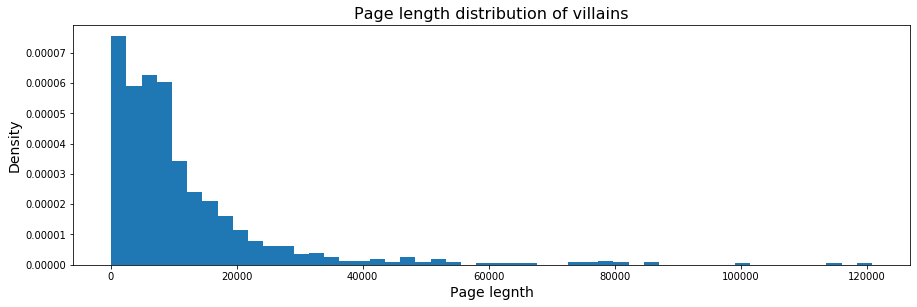

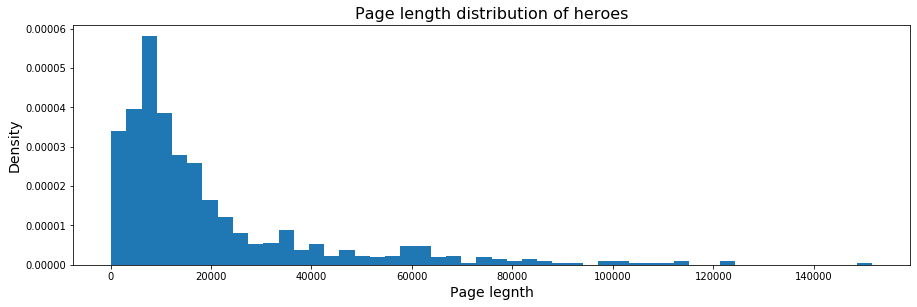

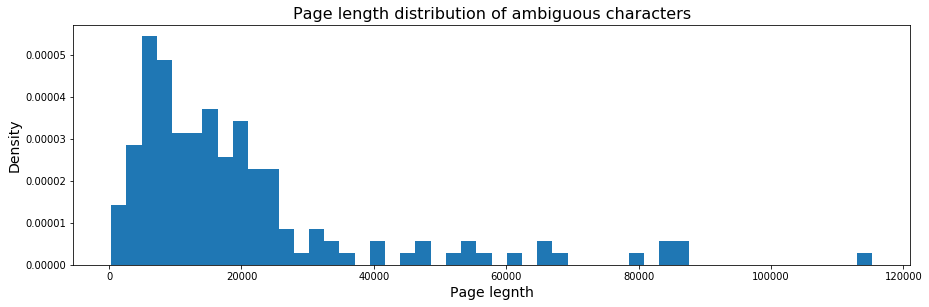

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title('Page length distribution of villains', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Page legnth', fontsize=14)
plt.hist(lengths_villains, bins=50, density=True)
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
plt.title('Page length distribution of heroes', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Page legnth', fontsize=14)
plt.hist(lengths_heroes, bins=50, density=True)
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(3,1,3)
plt.title('Page length distribution of ambiguous characters', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Page legnth', fontsize=14)
plt.hist(lengths_ambiguous, bins=50, density=True)
plt.show()

> Based on the visualizations, it seems like the popularity is rather similar across all three groups. We can note that, by examining an estimate of how many characters have the shortest page lengths in each group, ambiguous characters seem the most popular, followed by heroes, and then villains. It seems in general, that there is more to discuss about ambiguous characters. This could be attributed to ambiguous character potentially causing more drama as they have dabbled in both sides of the MCU.

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

## SOLUTION:

> The following cell defines `extract_char_length(directory_path)` which computes the page lengths of characters in the specified `directory_path`. It also defines the function `find_top_ten_chars(directory_path)` which finds the 10 characters from the given class (`directory_path`) with the longest Wikipedia pages.

In [ ]:
import numpy as np

def extract_char_length(directory_path):
    """returns list of lengths of each characters and their page lengths
    
    Args:
        directory_path: directory of the markup files
    
    Returns:
        [[(str),(int)]]: list of characters and their respective page lengths
    """
    lengths = []
    for character in listdir(directory_path + '/'):
        with open(directory_path + '/' + character, 'r') as f:
            char = character[:-4]
            length = len(f.read())
            lengths.append([char, length])
    
    return lengths


def find_top_ten_chars(directory_path):
    """returns a list of the top ten characters and their page lengths
    
    Args:
        directory_path: directory of the markup files
        
    Returns:
        [[(str),(int)]]: list of top ten characters and their respective page lengths
    """
    lengths = extract_char_length(directory_path)
    lengths = np.array(lengths, dtype=object) # dtype=oject keeps our datatypes so int doesn't get cast to str literal
    
    # argsort by lengths
    args = np.argsort(lengths[:,1], -1)[::-1]
    
    topten = lengths[args][:10]
    
    return topten


In [ ]:
topten_villains = find_top_ten_chars(VILLAIN_DIR)
topten_heroes = find_top_ten_chars(HERO_DIR)
topten_ambiguous = find_top_ten_chars(AMBIGUOUS_DIR)

plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
plt.title('Top 10 Marvel supervillains page lengths', fontsize=20)
plt.ylabel('Page length', fontsize=14)
plt.xlabel('Supervillain', fontsize=14)
plt.bar(topten_villains[:,0], topten_villains[:,1])

plt.subplot(3,1,2)
plt.title('Top 10 Marvel superheroes page lengths', fontsize=20)
plt.ylabel('Page length', fontsize=14)
plt.xlabel('Superhero', fontsize=14)
plt.bar(topten_heroes[:,0], topten_heroes[:,1])

plt.subplot(3,1,3)
plt.title('Top 10 Marvel ambiguous characters page lengths', fontsize=20)
plt.ylabel('Page length', fontsize=14)
plt.xlabel('Ambiguous character', fontsize=14)
plt.bar(topten_ambiguous[:,0], topten_ambiguous[:,1])
plt.show()

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*

## SOLUTION: 
> The following cell defines the function `get_debut_years(directory_path)` which extracts the debut years of characters in the directory specified by the argument `directory_path`. 

In [ ]:
def get_debut_years(directory_path):
    """returns a list of the debut years of characters in the specified directory path.
    
    Skips pages without (a) debut year(s). Takes the earliest year for pages with multiple debut years. 
    
    Args:
        directory_path: directory containing character markup files
        
    Returns:
        [(int)]: list of debut years of characters in the specified directory in ints
    
    """
    
    debut_years = [] # list of debut years
    
    for character in listdir(directory_path + '/'):
        with open(directory_path + '/' + character, 'r') as f:
            markup = f.read()
            debut_line = re.findall(r"\|debut.*", markup) # find lines that contain the debut information
            
            if debut_line == []: # skip if no debut line(s)
                continue
            
            debut_line = debut_line[0]
            debut_year = re.findall(r"\d{4}", debut_line) # extract the debut year(s)
            
            if debut_year == []: # skip if no date(s)
                continue
                
            debut_year = np.min(np.array(debut_year, dtype=np.int)) # convert to ints and take the smallest debut year
            debut_years.append(debut_year)
    
    return debut_years

def get_all_debut_years():
    """returns three lists - debut yeras of supervillains, superheroes, and ambiguous characters"""
    
    return get_debut_years(VILLAIN_DIR), get_debut_years(HERO_DIR), get_debut_years(AMBIGUOUS_DIR)

In [ ]:
debut_years_villains, debut_years_heroes, debut_years_ambiguous = get_all_debut_years()

> Here, we plot the total number of characters in the MCU by year for each group: supervillains, superheroes, and ambiguous characters. By plotting a line and the total number of characters, we get a better sense of the overall distribution of characters by group instead of yearly introductions of new characters. 

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharey=True)

plt.title('Total number of characters in the Marvel Comic Universe by year, \ncategorized by class role', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of characters', fontsize=18)



ax.plot(np.sort(debut_years_villains), range(1,len(debut_years_villains)+1), label='Supervillains')
ax.plot(np.sort(debut_years_heroes), range(1,len(debut_years_heroes)+1), label='Superheroes')
ax.plot(np.sort(debut_years_ambiguous), range(1, len(debut_years_ambiguous)+1), label='Ambiguous characters')
ax.set_xlim(1930, 2020)

ax.legend(loc=2, fontsize=16)



plt.show()

> Note that the line for the supervillains continues from the left of the figure. This can be attributed to a  singlecharacter who debuted in the *year 1026*. An executive decision was made to exclude this single point from the plot since its inclusion does not add much in meaning to the visualization.
It is interesting to see that initially there were more superheroes than both supervillains and ambiguous characters. This trend does not last for long as there is a significant increase in the number of supervillain introductions in the 60's. 